# Visualization Using WordCloud

This Code template is to summarize vast pieces of information visually. It is created using WordCloud from wordcloud package.

### Required Packages

In [272]:
pip install wordcloud
pip install nltk

In [77]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re, string
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

### Initialisation

File path of a text file

In [78]:
#filepath
file_path = "C:/Users/aish2/Documents/BlobCity/Datasets/NLP/Text Summarisation/business.txt"

### Reading text file

Reading a text file is easy in python compared to other programming languages.We just use open() function in reading or writing mode, loop through readlines() to store in a string variable as we are working on string and not a list.

In [79]:
with open(file_path) as f:
    file_content = ''
    for x in f.readlines():
        file_content += '' +x
file_content[:1000]

"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig


### Data Preprocessing

The text data might contain noise in various forms like emotions, punctuation, text in a different case etc. We apply various text preprocessing methods such as converting text to lowercase, remove text in square brackets, remove links, remove special characters and remove words containing numbers to clean the text data and make it ready to feed data to the model.

We also apply lemmetization technique to the data which groups together the different canonical forms of a word so they can be analysed as a single item which ultimately improves model accuracy.


In [80]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.sub(r'[^\w\s]', ' ', str(text))                       
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    return text

# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def textfinalpreprocess(string):
    return preprocess(lemmatizer(stopword(preprocess(string))))

In [81]:
processed_text = textfinalpreprocess(file_content)
processed_text[:1000]

'ad sale boost time warner profit quarterly profit medium giant timewarner jump bn three month december year earlier firm one big investor google benefit sale high speed internet connection higher advert sale timewarner say fourth quarter sale rise bn bn profit buoy one gain offset profit dip warner bros less user aol time warner say friday own search engine google internet business aol mixed fortune lose subscriber fourth quarter profit lower precede three quarter however company say aol underlying profit exceptional item rise back strong internet advertising revenue hop increase subscriber offer online service free timewarner internet customer try sign aol exist customer high speed broadband timewarner also restate result follow probe security exchange commission sec close conclude time warner fourth quarter profit slightly good analyst expectation film division saw profit slump help box office flop alexander catwoman sharp contrast year earlier third final film lord ring trilogy boo

### Word Cloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites. These keywords typically are single words that depict the context of the webpage the word cloud is being made from. These words are clustered together to form a Word Cloud.

Each word in this cloud has a variable font size and color tone. Thus, this representation helps to determine words of prominence. A bigger font size of a word portrays its prominence more relative to other words in the cluster. 

Refer [API](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) for parameters

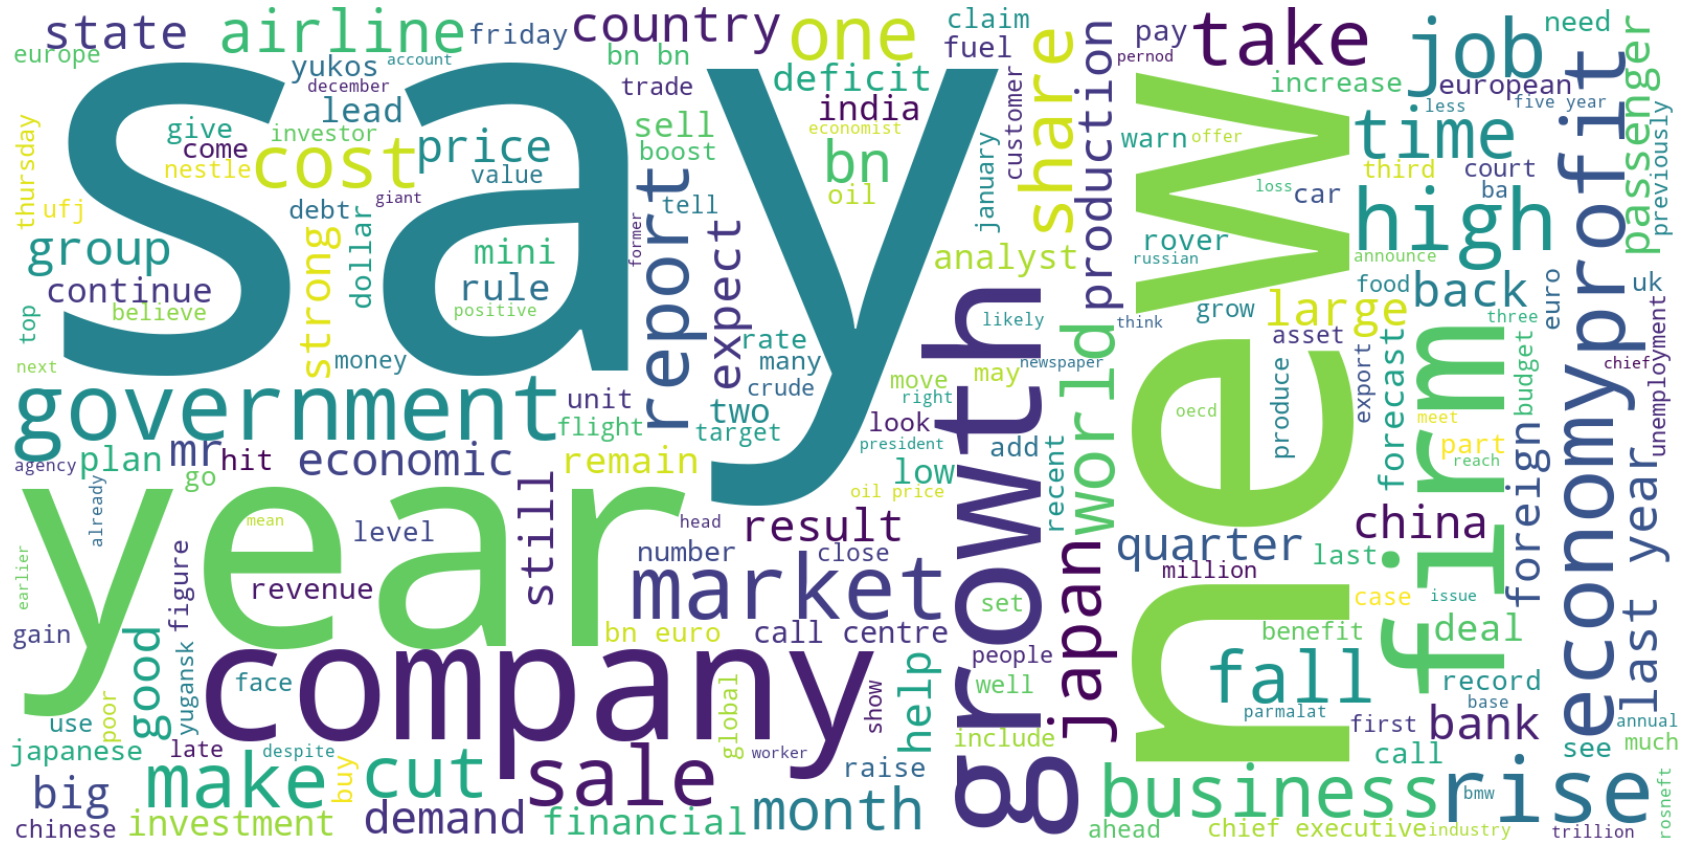

In [82]:
wordcloud = WordCloud(background_color='white',width=1600, height=800).generate(processed_text)
plt.figure( figsize=(30,20))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
wordcloud.to_file('./wordcloud.png')

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)